# Download and extract images
The cell below downloads images of pets from [PyTorch](https://pytorch.org/vision/stable/generated/torchvision.datasets.OxfordIIITPet.html), which gets the images from [Oxford's iiit pets dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/).

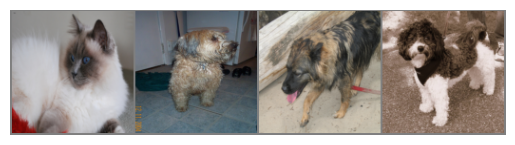

Birman | Wheaten Terrier | Keeshond | Havanese


In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Transform to normalize and convert the images to tensors
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the Oxford Pets dataset
trainset = torchvision.datasets.OxfordIIITPet(root='../data', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose to display as (height, width, channels)
    plt.axis('off')  # Hide axes
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show the images
imshow(torchvision.utils.make_grid(images))

# Print labels for the shown images
classes = trainset.classes  # Get the class names from the dataset
print(' | '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
